<a href="https://colab.research.google.com/github/flyforward2016/fastbook/blob/master/clean/02_production_regs_Bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

In [2]:
# Check for GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Dec 26 21:23:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Check for memory.
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 21.3MB/s 
     |████████████████████████████████| 194kB 18.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 1.1MB 45.2MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
Mounted at /content/gdrive


Importing the fast.ai presets mounts your own Google Drive on `/content/gdrive`

## Getting Images

In [5]:
from pathlib import Path

# create the directory structure
dog_dir = Path().cwd() / 'gdrive' / 'My Drive' / 'data' / 'dog_breed_classifier'
dog_dir.mkdir(parents=True, exist_ok=True)
dog_dir.is_dir() # testing

True




1.   [Path.cwd()](https://stackabuse.com/introduction-to-the-python-pathlib-module/#:~:text=In%20Pathlib%2C%20the%20Path.,into%20a%20compound%20path%20object.) 
This is to get the current file path.
2.   [Parent and exist setting](https://stackoverflow.com/questions/600268/mkdir-p-functionality-in-python)
Parent is true will add any missing parents of this path. 
exist_ok will ignore any FileExistError exceptions




In [ ]:
?? Path.mkdir

[untar-ref1](https://flaviocopes.com/linux-command-tar/)
<br>
[untar-ref2](https://gist.github.com/flyforward2016/3bbeaf6dfef31a6f34b4afd227403fa5)
<br>
To Compress a file or directory
e.g: 
<br>  tar -czvf name-of-archive.tar.gz /path/to directory-or-file 

`-c`: Create an archive.
`-z`: Compress the archive with gzip.
`-v`: makes tar talk a lot. Verbose output shows you all the files being archived and much.
`-f`: Allows you to specify the filename of the archive.

<br>
e.g: tar -xvzf name-of-archive.tar.gz

`f` this must be the last flag of the command, and the tar file must be immediately after. It tells tar the name and path of the compressed file.
`z`: tells tar to decompress the archive using gzip
`x`: tar can collect files or extract them. x does the latter.
`v`: makes tar talk a lot. Verbose output shows you all the files being extracted.



Create a file called `urls.txt` that contains a couple of URLs of pictures of Regs, then download these images

In [ ]:
regs_urls = ["https://i.imgur.com/0U4Nf4a.jpg",
             "https://i.imgur.com/nwzvxBT.jpg",
             "https://i.imgur.com/wB411cU.jpg",
             "https://i.imgur.com/fIIc99b.jpg"]

with open(dog_dir / 'urls.txt','w') as fout: 
  for url in regs_urls:
      fout.write(url +'\n')

In [ ]:
# check out the docs by running: doc(download_image)
download_images(dog_dir, url_file=dog_dir / 'urls.txt')

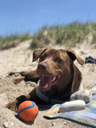

In [ ]:
dest = '/content/gdrive/MyDrive/data/dog_breed_classifier/00000000.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

## Gathering the Dataset

**NOTE**: There might be a more elegant way to download & untar a dataset using fast.ai functions directly.

But in essence, the next three cells download the Standford Vision dog breed dataset, untar it into the previously created folder structure, and give a glimpse of what's in there

In [ ]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2020-12-25 20:14:42--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  10.8MB/s    in 58s     

2020-12-25 20:15:40 (13.2 MB/s) - ‘images.tar’ saved [793579520/793579520]



[wget](https://linuxize.com/post/wget-command-examples/)
Without any options specified. wget will download the file to current directory.  

**to extract to certain folder**
<br>
tar -xf archive.tar -C directory

In [ ]:
!tar -xvf images.tar -C /content/gdrive/MyDrive/data/dog_breed_classifier/

In [ ]:
!cd gdrive/"My Drive"/data/dog_breed_classifier/Images && ls

In [6]:
dog_dir

Path('/content/gdrive/My Drive/data/dog_breed_classifier')

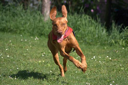

In [ ]:
dest = dog_dir/"Images"/"n02100583-vizsla"/"n02100583_9922.jpg"
im = Image.open(dest)
im.to_thumb(128,128)

Our folder has image files, as we'd expect:

In [7]:
path = dog_dir / "Images"
fns = get_image_files(path)
fns

(#20580) [Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_10621.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_10976.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_11238.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_11258.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_11337.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_1152.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_11696.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_11818.jpg'),Path('/content/gdrive/My Drive/data/dog_breed_classifier/Images/n02085620-Chihuahua/n02085620_11948.jpg'),Path('/content/gdrive/My Drive/data/d

Often when we download files from the internet, there are a few that are corrupt. However, in this case the data comes from a dataset designed for computer vision, so it might be fine. Let's still verify:

In [ ]:
failed = verify_images(fns)

In [ ]:
failed

(#0) []

All good. In case something would fail, you can unlink it using: `failed.map(Path.unlink);`

Now that we have downloaded some data, we need to assemble it in a format suitable for model training. In fastai, that means creating an object called `DataLoaders`.

## From Data to DataLoaders

In [8]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # This tells fastai which types of DL this is - an image classification
    get_items=get_image_files, # This get the path of images from dataloader. 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, # Tell to get the class from parent folder name
    item_tfms=Resize(128)) # This makes all the figure same size. 

In [9]:
dls = dogs.dataloaders(path)

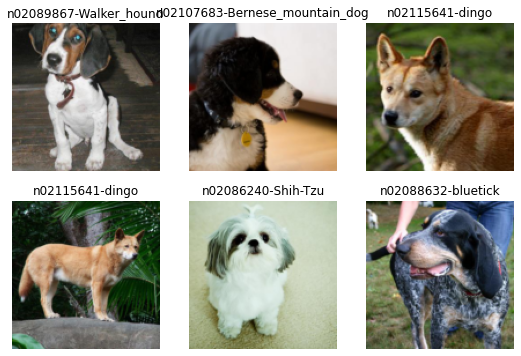

In [10]:
dls.valid.show_batch(max_n=6, nrows=2) # this is to show the batch that send to GPU in parallel

In [11]:
dogs.blocks

(fastai.data.block.TransformBlock, fastai.data.block.TransformBlock)

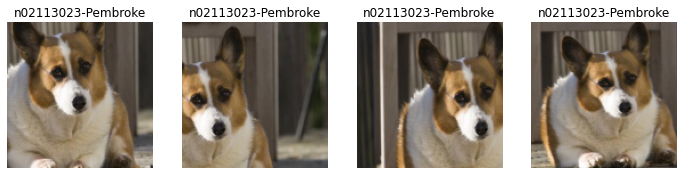

In [12]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Data Augmentation

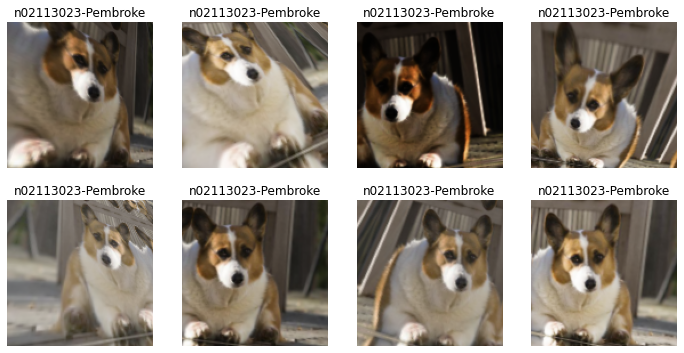

In [13]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

## Training Your Model, and Using It to Clean Your Data

In [ ]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

We can now create our Learner and fine-tune it in the usual way:


In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn


[Use Hyperdash to track status of training](https://github.com/hyperdashio/hyperdash-sdk-py/blob/master/README.md)

In [14]:
!pip install hyperdash
from hyperdash import monitor_cell

  Created wheel for hyperdash: filename=hyperdash-0.15.3-cp36-none-any.whl size=28553 sha256=abc9b11c68d3a55755c5f53c901c52b53456c66c9d27ab4351a3a9479b39f75b
  Stored in directory: /root/.cache/pip/wheels/62/5f/af/bbcaeb6570e4904c14fb4c1b70fee559a3788182ce4d104ce7
Successfully built hyperdash


In [ ]:
# Log in hyperdash
!hyperdash login --email

Email address: nankaifanbin@gmail.com
Password: 
Successfully logged in! We also installed: 2sV4joFDU+XzNUuIURn+RxSMErKr7dDcp6um/5/dojM= as your default API key


In [ ]:
%%monitor_cell “model/fine_tune” 
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.988930,0.804252,0.248785,02:16


epoch,train_loss,valid_loss,error_rate,time
0,0.947713,0.788854,0.236880,02:21
1,0.760172,0.691037,0.205782,02:22


This run of “model/experiment name” ran for 0:07:01 and logs are available locally at: /root/.hyperdash/logs/model-experiment-name/model-experiment-name_2020-12-26t01-56-13-538293.log


/usr/local/lib/python3.6/dist-packages/fastai/interpret.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


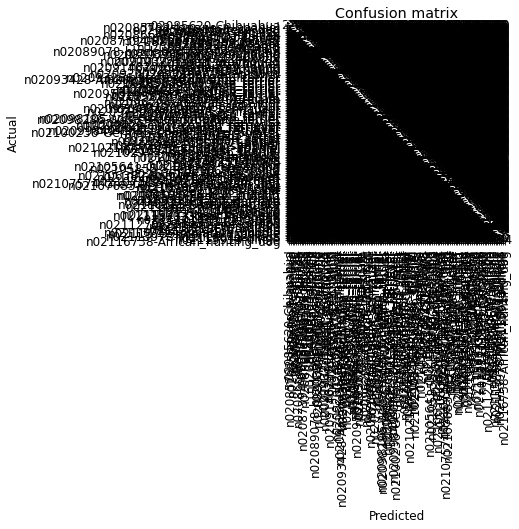

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

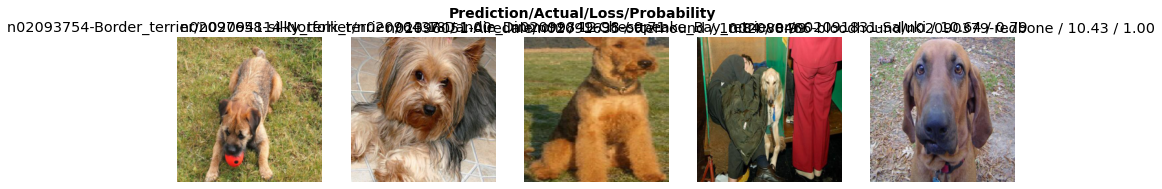

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
image_name = '00000000'

[Python f-strings](https://realpython.com/python-f-strings/#f-strings-a-new-and-improved-way-to-format-strings-in-python)

In [ ]:
prediction = learn.predict(dog_dir / f"{image_name}.jpg") # This is called f-strings
prediction

('n02099849-Chesapeake_Bay_retriever',
 tensor(58),
 tensor([1.2139e-05, 3.6033e-06, 6.6810e-07, 5.0187e-07, 4.2877e-07, 1.3602e-07, 2.0603e-07, 6.4103e-06, 2.0859e-03, 4.4773e-08, 1.1333e-06, 7.5065e-06, 2.2544e-06, 1.8402e-06, 2.2897e-07, 1.3275e-06,
         2.5113e-06, 8.4685e-05, 1.0018e-07, 1.3256e-05, 2.0877e-04, 1.7129e-04, 2.2470e-05, 1.9858e-06, 4.1632e-06, 1.6617e-07, 5.1739e-06, 5.5980e-03, 5.1220e-04, 1.4835e-02, 1.3454e-06, 1.7882e-04,
         9.3171e-06, 5.0939e-05, 1.2310e-05, 1.6111e-06, 1.7490e-06, 7.6261e-07, 1.6976e-05, 4.4075e-07, 4.5024e-05, 1.8259e-07, 2.7981e-06, 2.5365e-07, 6.3650e-06, 2.7055e-07, 2.7435e-06, 3.8244e-07,
         3.0072e-07, 6.7550e-07, 4.0669e-06, 1.4984e-07, 2.7812e-07, 9.7414e-08, 3.4649e-04, 2.5171e-03, 3.3787e-05, 1.4776e-02, 9.4245e-01, 1.9766e-03, 1.2074e-02, 2.4606e-07, 4.1774e-06, 8.9705e-07,
         2.3744e-06, 9.1841e-07, 1.5106e-05, 8.5714e-07, 4.1360e-07, 7.6668e-05, 2.1357e-04, 3.9371e-05, 2.4966e-06, 6.8050e-07, 9.2042e-06, 7.5

In [ ]:
prediction[0]

'n02099849-Chesapeake_Bay_retriever'

In [ ]:
print(prediction[0].split("-")[1]) # python string split function. [1] refers to maxsplit.

Chesapeake_Bay_retriever


In [ ]:

def regs(image_name):
  """"Shows a pic of Regs and a prediction of what breed he is."""
  prediction = learn.predict(dog_dir / f"{image_name}.jpg")
  print(prediction[0].split("-")[1])
  return Image.open(dog_dir / f"{image_name}.jpg").to_thumb(128)

Weimaraner


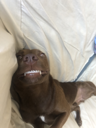

In [ ]:
regs('00000001')

## Turning Your Model into an Online Application

[How to change save directory](https://forums.fast.ai/t/how-to-save-fast-ai-resnet50-model-to-google-drive-after-training-in-google-colab-notebook/50426/4)

In [17]:
path = Path(dog_dir)

In [19]:
learn.path = path # set path to learn. Then when export, it can save in Gdrive.
learn.path

Path('/content/gdrive/My Drive/data/dog_breed_classifier')

In [ ]:
learn.export() # This will save both the architecture and the parameters

In [ ]:
path.ls(file_exts='.pkl')

(#1) [Path('/content/gdrive/My Drive/data/dog_breed_classifier/export.pkl')]

In [ ]:
!pwd

/content


[How to save and reload a fastai model](https://forums.fast.ai/t/saving-and-using-a-model/47216/2)

In [25]:
??load_learner

In [20]:
learn2=load_learner("/content/gdrive/MyDrive/data/dog_breed_classifier/export.pkl")

**How to do inference**

In [21]:
learn2.predict(dog_dir / "00000000.jpg") # it returns the predicted category / index of the predicted category
# the probabilites of each category

('n02099849-Chesapeake_Bay_retriever',
 tensor(58),
 tensor([1.2139e-05, 3.6032e-06, 6.6809e-07, 5.0186e-07, 4.2877e-07, 1.3602e-07, 2.0602e-07, 6.4102e-06, 2.0859e-03, 4.4772e-08, 1.1332e-06, 7.5064e-06, 2.2544e-06, 1.8402e-06, 2.2896e-07, 1.3275e-06,
         2.5113e-06, 8.4685e-05, 1.0018e-07, 1.3255e-05, 2.0877e-04, 1.7129e-04, 2.2470e-05, 1.9858e-06, 4.1631e-06, 1.6616e-07, 5.1738e-06, 5.5980e-03, 5.1220e-04, 1.4835e-02, 1.3454e-06, 1.7882e-04,
         9.3170e-06, 5.0939e-05, 1.2310e-05, 1.6111e-06, 1.7490e-06, 7.6260e-07, 1.6975e-05, 4.4075e-07, 4.5023e-05, 1.8259e-07, 2.7981e-06, 2.5365e-07, 6.3648e-06, 2.7054e-07, 2.7435e-06, 3.8243e-07,
         3.0072e-07, 6.7549e-07, 4.0668e-06, 1.4984e-07, 2.7811e-07, 9.7412e-08, 3.4649e-04, 2.5171e-03, 3.3786e-05, 1.4776e-02, 9.4245e-01, 1.9766e-03, 1.2074e-02, 2.4606e-07, 4.1774e-06, 8.9704e-07,
         2.3743e-06, 9.1839e-07, 1.5106e-05, 8.5713e-07, 4.1359e-07, 7.6666e-05, 2.1357e-04, 3.9370e-05, 2.4965e-06, 6.8048e-07, 9.2041e-06, 7.5

In [24]:
learn2.dls.vocab # This is to list all the categories.

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

**Create a GUI using python**

In [26]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

PLIImage comes from pillow package and Image object. 
<br>This is also part of Fastai package. See doc(PILImage)
[Pillow / Image Module](https://pillow.readthedocs.io/en/stable/reference/Image.html)

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [44]:
doc(PILImage)

In [36]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Then we can get our predictions

In [37]:
pred,pred_idx,probs = learn2.predict(img)

use a `label` to display them:

In [38]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: n02099429-curly-coated_retriever; Probability: 0.1695')

Now we need a `button` for the classifier

In [40]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn2.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [42]:
btn_upload = widgets.FileUpload()

In [46]:
doc(widgets.Button.on_click) # fucntion on_click_classify is the callback function

In [43]:
#hide_output
VBox([widgets.Label('Select your dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

**Cannot got the voila setup in Jupyter notebook**


In [ ]:
#Issue with installing Volia after running
!pip install nbconvert>=6.0.0
!pip install nbconvert
!pip install voila'
!jupyter serverextension enable --sys-prefix voila 

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?

The error coming after jupyter serverextension command